# Scrap

In [9]:
%pip install seleniumbase
!apt install chromium-chromedriver

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  apparmor chromium-browser libfuse3-3 liblzo2-2 libudev1 snapd squashfs-tools systemd-hwe-hwdb
  udev
Suggested packages:
  apparmor-profiles-extra apparmor-utils fuse3 zenity | kdialog
The following NEW packages will be installed:
  apparmor chromium-browser chromium-chromedriver libfuse3-3 liblzo2-2 snapd squashfs-tools
  systemd-hwe-hwdb udev
The following packages will be upgraded:
  libudev1
1 upgraded, 9 newly installed, 0 to remove and 48 not upgraded.
Need to get 30.2 MB of archives.
After this operation, 123 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 apparmor amd64 3.0.4-2ubuntu2.4 [598 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/main amd64 liblzo2-2 amd64 2.10-2build3 [53.7 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/main amd64 squashfs-tools amd64 1:4.5-3

In [3]:
import undetected_chromedriver as uc
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import time

# Créer une instance de Chrome en mode "undetected"
driver = uc.Chrome()

driver.get("https://courses.monoprix.fr/")

# Accepter la bannière cookies si présente
try:
    accept_cookies_btn = WebDriverWait(driver, 10).until(
        EC.element_to_be_clickable((By.ID, 'onetrust-accept-btn-handler'))
    )
    accept_cookies_btn.click()
    print("Bannière de cookies acceptée.")
except:
    print("Pas de bannière de cookies à accepter.")

# Cliquer sur "Se connecter"
element = WebDriverWait(driver, 10).until(
    EC.element_to_be_clickable((By.XPATH, "/html/body/div[1]/div/div[1]/main/div[1]/div[1]/a/div"))
)
element.click()

# Saisir l'e-mail
email_field = WebDriverWait(driver, 20).until(
    EC.presence_of_element_located((By.ID, 'email'))
)
email_field.click()
email_field.send_keys("2lowlay@tutamail.com")
time.sleep(2)

# Appuyer sur Entrée après la saisie de l'email
email_field.send_keys(Keys.ENTER)

# Attendre quelques secondes que la page se mette à jour
time.sleep(10)

print("URL après validation :", driver.current_url)
print("Récupération du mot de passe...")

try:
    password_field = WebDriverWait(driver, 30).until(
        EC.visibility_of_element_located((By.CSS_SELECTOR, 'input[type="password"]'))
    )
    password_field.click()
    password_field.send_keys("Lavague2120208!!")
    password_val = WebDriverWait(driver, 2).until(
        EC.visibility_of_element_located((By.XPATH, '//*[@id="__next"]/div/div/div/div[2]/div/form/button'))
    )
    password_val.click()
    print("Le champ mot de passe a été trouvé et rempli.")
except:
    print("Le champ mot de passe n'a pas été trouvé.")

# Attendre que la page principale soit chargée après connexion
time.sleep(5)

# A ce stade, vous devriez être sur la page principale après la connexion.
# On va maintenant récupérer les liens des catégories.
try:
    # On attend l'apparition des liens de catégories
    categories_links = WebDriverWait(driver, 20).until(
        EC.presence_of_all_elements_located((By.CSS_SELECTOR, 'a[data-test="root-category-link"]'))
    )
    categories_dict = {}

    for link in categories_links:
        href = link.get_attribute('href')
        category_id = href.split('/')[-1]
        category_name = link.text.strip()  # Le nom de la catégorie est le texte du lien
        categories_dict[category_name] = category_id

    print("Dictionnaire des catégories :", categories_dict)

except Exception as e:
    print("Impossible de récupérer les catégories :", e)


# Fermer le navigateur
driver.quit()




Bannière de cookies acceptée.
URL après validation : https://client.monoprix.fr/monoprix-plus/login
Récupération du mot de passe...
Le champ mot de passe a été trouvé et rempli.
Dictionnaire des catégories : {'Promotions': '3d423a4e-70eb-4d3b-8b86-f64a46097f8f', 'Noël': 'cd4de4d4-8910-4a7f-9740-097347cf310e', 'Mes marques Monoprix': 'cf99332a-fc5d-4264-b5a5-3301621023e7', 'Bio': '5b5c3312-5e79-47bf-b4ea-89a285e58d5c', 'La Halle': 'e520ef7a-cbe7-4603-b186-5ecd5feb76a9', 'Fruits & Légumes': '5671998e-3a4f-4eb5-af6f-1f8295463185', 'Produits Laitiers, Œufs et Fromages': 'aa4d679d-2d26-441d-8423-071878880b3a', 'Charcuterie et Traiteur': '0495e644-aada-4859-8e47-582982b74821', 'Boucherie et Volaille': '8037bfe4-1ac8-41d0-9d11-17e8d4dcafe7', 'Produits de la Mer': '2e63bc47-6a12-4dab-a3c6-00f02c5340a5', 'Pain et Viennoiserie': '10a31bca-8ebd-4e6f-92ff-6ae59ab38b3c', 'Surgelés': '6174c656-9e47-431f-bc5d-d80f6252805e', 'Epicerie Sucrée': 'bd800ae5-5dde-488d-b187-0d9578581d61', 'Epicerie Salée': 

In [4]:
len(categories_dict)

30

In [6]:
base_url = "https://courses.monoprix.fr/api/v5/products?category="
api_links_dict = {category_name: base_url + cat_id for category_name, cat_id in categories_dict.items()}

print("Dictionnaire des liens d'API:")
for category_name, link in api_links_dict.items():
    print(f"{category_name} : {link}")


Dictionnaire des liens d'API:
Promotions : https://courses.monoprix.fr/api/v5/products?category=3d423a4e-70eb-4d3b-8b86-f64a46097f8f
Noël : https://courses.monoprix.fr/api/v5/products?category=cd4de4d4-8910-4a7f-9740-097347cf310e
Mes marques Monoprix : https://courses.monoprix.fr/api/v5/products?category=cf99332a-fc5d-4264-b5a5-3301621023e7
Bio : https://courses.monoprix.fr/api/v5/products?category=5b5c3312-5e79-47bf-b4ea-89a285e58d5c
La Halle : https://courses.monoprix.fr/api/v5/products?category=e520ef7a-cbe7-4603-b186-5ecd5feb76a9
Fruits & Légumes : https://courses.monoprix.fr/api/v5/products?category=5671998e-3a4f-4eb5-af6f-1f8295463185
Produits Laitiers, Œufs et Fromages : https://courses.monoprix.fr/api/v5/products?category=aa4d679d-2d26-441d-8423-071878880b3a
Charcuterie et Traiteur : https://courses.monoprix.fr/api/v5/products?category=0495e644-aada-4859-8e47-582982b74821
Boucherie et Volaille : https://courses.monoprix.fr/api/v5/products?category=8037bfe4-1ac8-41d0-9d11-17e8d4

In [ ]:
# Création du dictionnaire final qui va contenir les produits par catégorie
category_products = {}

for category_name, link in api_links_dict.items():
    # Récupération de l'ID associé au nom, au cas où vous en ayez besoin
    cat_id = categories_dict[category_name]
    print(f"Récupération des produits pour la catégorie: {category_name} ({cat_id})")
    response = requests.get(link)

    if response.status_code == 200:
        data = response.json()
        on_offer_products = []
        group_products = []

        # Vérification de la présence de result.productGroups
        if "result" in data and "productGroups" in data["result"]:
            for pg in data["result"]["productGroups"]:
                if pg.get("type") == "on_offer":
                    on_offer_products.extend(pg.get("products", []))
                elif pg.get("type") == "group":
                    group_products.extend(pg.get("products", []))

        # Stockage des produits dans le dictionnaire final sous le nom de la catégorie
        category_products[category_name] = {
            "on_offer": on_offer_products,
            "group": group_products
        }
    else:
        print(f"La requête pour la catégorie {cat_id} ({category_name}) a échoué avec le code :", response.status_code)

# Pour tester le résultat sur la première catégorie :
if categories_dict:
    some_category_name = next(iter(categories_dict))
    print("Catégorie :", some_category_name)
    print("Produits on_offer :", category_products[some_category_name]["on_offer"])
    print("Produits group :", category_products[some_category_name]["group"])


Récupération des produits pour la catégorie: Promotions (3d423a4e-70eb-4d3b-8b86-f64a46097f8f)
Récupération des produits pour la catégorie: Noël (cd4de4d4-8910-4a7f-9740-097347cf310e)
Récupération des produits pour la catégorie: Mes marques Monoprix (cf99332a-fc5d-4264-b5a5-3301621023e7)
Récupération des produits pour la catégorie: Bio (5b5c3312-5e79-47bf-b4ea-89a285e58d5c)
Récupération des produits pour la catégorie: La Halle (e520ef7a-cbe7-4603-b186-5ecd5feb76a9)
Récupération des produits pour la catégorie: Fruits & Légumes (5671998e-3a4f-4eb5-af6f-1f8295463185)
Récupération des produits pour la catégorie: Produits Laitiers, Œufs et Fromages (aa4d679d-2d26-441d-8423-071878880b3a)
Récupération des produits pour la catégorie: Charcuterie et Traiteur (0495e644-aada-4859-8e47-582982b74821)
Récupération des produits pour la catégorie: Boucherie et Volaille (8037bfe4-1ac8-41d0-9d11-17e8d4dcafe7)
Récupération des produits pour la catégorie: Produits de la Mer (2e63bc47-6a12-4dab-a3c6-00f02c

In [ ]:

print("Catégorie : Epicerie Salée")
print("Produits on_offer :", len(category_products["Epicerie Salée"]["on_offer"]))
print("Produits group :", len(category_products["Epicerie Salée"]["group"]))
#on à le meme nombre que ceux que j'avais manuellement compter

Catégorie : Epicerie Salée
Produits on_offer : 35
Produits group : 265


In [ ]:
#test de récupération avec une partie des identifiant produit
some_category_name = next(iter(category_products))

# On récupère une liste de quelques produits (on_offer + group)
all_products = category_products[some_category_name]["on_offer"] + category_products[some_category_name]["group"]

# Pour le test, on ne prend que quelques produits (par exemple 20, si disponibles)
test_products = all_products[:20]

# On construit la chaîne de caractères pour la requête
product_ids_str = ",".join(test_products)

# URL de la requête products/decorate
test_url = "https://courses.monoprix.fr/api/v5/products/decorate?productIds=" + product_ids_str

response = requests.get(test_url)
if response.status_code == 200:
    data = response.json()
    # On enregistre les données dans un fichier JSON
    with open("product_details.json", "w") as f:
        json.dump(data, f, ensure_ascii=False, indent=4)

    print("Données récupérées et enregistrées dans product_details.json")

else:
    print("Erreur lors de la requête:", response.status_code, response.text)


Données récupérées et enregistrées dans product_details.json


In [ ]:
print(data)

{'products': [{'productId': 'cc1ef203-11e2-4f2a-a64d-b28250978acd', 'retailerProductId': 'MPX_2638867', 'name': 'Président Beurre Gastronomique doux 82% MG Plaquette 250g', 'available': True, 'maxQuantityReached': False, 'alternatives': [], 'price': {'current': {'amount': '2.99', 'currency': 'EUR'}, 'unit': {'label': 'fop.price.per.kg', 'current': {'amount': '11.96', 'currency': 'EUR'}}}, 'isInCurrentCatalog': True, 'isInProductList': False, 'categoryPath': ['Promotions', 'Les promos à ne pas manquer', 'Beurre Président, 50% sur le 2ème'], 'guaranteedProductLife': {'quantity': 3, 'unit': 'WEEK'}, 'brand': 'President', 'retailerFinancingPlanIds': [], 'image': {'src': 'https://courses.monoprix.fr/images-v3/0c44253f-c4a3-4340-9d37-d41e42b9d14a/60ab82de-75bc-45b2-ade5-d9a3016b64d3/300x300.jpg', 'description': 'Président Beurre Gastronomique doux 82% MG Plaquette 250g', 'fopSrcset': 'https://courses.monoprix.fr/images-v3/0c44253f-c4a3-4340-9d37-d41e42b9d14a/60ab82de-75bc-45b2-ade5-d9a3016b6

In [ ]:
import requests
import json
import time
import os

# Suppose que category_products est déjà défini, par exemple :
# category_products = {
#     "Pain et Viennoiserie": {
#         "on_offer": ["id1", "id2", ...],
#         "group": ["id3", "id4", ...]
#     },
#     "Fruits et Légumes": {
#         "on_offer": [...],
#         "group": [...]
#     },
#     ...
# }

base_url = "https://courses.monoprix.fr/api/v5/products/decorate?productIds="
batch_size = 20  # Nombre de produits par requête
pause_duration = 2  # Pause de 2 secondes entre chaque requête

# Créer un dossier pour stocker les résultats si nécessaire
output_dir = "product_details_data"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

for category_name, products_dict in category_products.items():
    # Récupération de tous les produits (on_offer + group)
    all_products = products_dict["on_offer"] + products_dict["group"]

    # Parcours des produits par batch de taille max batch_size
    for i in range(0, len(all_products), batch_size):
        batch_products = all_products[i:i+batch_size]
        product_ids_str = ",".join(batch_products)

        # URL de la requête
        test_url = base_url + product_ids_str
        response = requests.get(test_url)

        if response.status_code == 200:
            data = response.json()

            # Nom de fichier JSON (par ex : product_details_Pain et Viennoiserie_0.json)
            batch_index = i // batch_size
            safe_category_name = category_name.replace(" ", "_").replace("/", "_")  # Pour éviter les problèmes de nommage
            filename = f"product_details_{safe_category_name}_{batch_index}.json"
            filepath = os.path.join(output_dir, filename)

            with open(filepath, "w", encoding="utf-8") as f:
                json.dump(data, f, ensure_ascii=False, indent=4)

            print(f"Données récupérées pour {category_name}, batch {batch_index} et enregistrées dans {filename}")
        else:
            print(f"Erreur lors de la requête pour {category_name} (batch {i//batch_size}):", response.status_code, response.text)

        # Pause entre les requêtes pour éviter de surcharger le serveur
        time.sleep(pause_duration)


Données récupérées pour Promotions, batch 0 et enregistrées dans product_details_Promotions_0.json
Données récupérées pour Promotions, batch 1 et enregistrées dans product_details_Promotions_1.json
Données récupérées pour Promotions, batch 2 et enregistrées dans product_details_Promotions_2.json
Données récupérées pour Promotions, batch 3 et enregistrées dans product_details_Promotions_3.json
Données récupérées pour Promotions, batch 4 et enregistrées dans product_details_Promotions_4.json
Données récupérées pour Promotions, batch 5 et enregistrées dans product_details_Promotions_5.json
Données récupérées pour Promotions, batch 6 et enregistrées dans product_details_Promotions_6.json
Données récupérées pour Promotions, batch 7 et enregistrées dans product_details_Promotions_7.json
Données récupérées pour Promotions, batch 8 et enregistrées dans product_details_Promotions_8.json
Données récupérées pour Promotions, batch 9 et enregistrées dans product_details_Promotions_9.json
Données ré

# look into the data

In [25]:
import pandas as pd
df = pd.read_csv('/Users/lml/Documents/Golem/scripts/price-comparator/monoprix-dashboard/public/products_v2_curated_deduplicated_change_cat_names.csv')
df.head()

FileNotFoundError: [Errno 2] No such file or directory: '/Users/lml/Documents/Golem/scripts/price-comparator/monoprix-dashboard/public/products_v2_curated_deduplicated_change_cat_names.csv'

In [3]:
df.columns

Index(['main_category', 'productId', 'retailerProductId', 'name', 'price_eur',
       'price_per_kg_eur', 'categoryPath', 'brand', 'available',
       'maxQuantityReached', 'featured', 'guaranteed_life_quantity',
       'guaranteed_life_unit', 'size_value', 'attributes_labels', 'image_src'],
      dtype='object')

In [9]:
def transform_categories(df):
    df['suffix'] = df['main_category'].str.split('_').str[1]
    df['main_category'] = df['main_category'].str.split('_').str[0]
    
    # Update categoryPath where suffix exists
    mask = df['suffix'].notna()
    df.loc[mask, 'categoryPath'] = df.loc[mask].apply(
        lambda x: eval(x['categoryPath']) + [x['suffix']], axis=1
    )
    
    # Drop temporary suffix column
    df = df.drop('suffix', axis=1)
    
    return df

# Apply transformation
df_curated = transform_categories(df)
df_curated.to_csv("products_v2_curated.csv", Index=False)


(26903, 16)

In [4]:
df = pd.read_csv("/Users/lml/Documents/Golem/scripts/price-comparator/monoprix-dashboard/public/products_v2_curated_deduplicated_change_cat_names.csv")
df

,Unnamed: 0,main_category,productId,retailerProductId,name,price_eur,price_per_kg_eur,categoryPath,brand,available,maxQuantityReached,featured,guaranteed_life_quantity,guaranteed_life_unit,size_value,attributes_labels,image_src
0,0,Animaux,0fe77782-bec5-4fa2-ab53-3aa047fcee33,MPX_3859604,Purina One Croquettes pour Chien Mini -10kg Co...,7.09,4.73,"['Animaux', 'Chien', 'Croquettes', 'Petits Chi...",Purina,True,False,False,1.0,MONTH,1.5kg,[],https://courses.monoprix.fr/images-v3/0c44253f...
1,1,Animaux,40735017-b24c-468f-8220-f818184aaba0,MPX_2753156,Catsan Litière Minérale Agglomérante Pour Chat 5L,6.29,1.26,"['Animaux', 'Chat', 'Litière']",Catsan,True,False,False,NaN,NaN,5L,[],https://courses.monoprix.fr/images-v3/0c44253f...
2,2,Animaux,c51ae972-f368-412d-91d4-c9744f462c10,MPX_2482411,Catsan Hygiène Plus Litière Minérale Pour Chat...,7.59,1.57,"['Animaux', 'Chat', 'Litière']",Catsan,True,False,False,1.0,YEAR,4.844kg,[],https://courses.monoprix.fr/images-v3/0c44253f...
3,3,Animaux,023aa724-7ce8-4804-aef9-c1a362e87e80,MPX_4220143,Sheba Filets Au Poulet Et Au Thon Msc Pour Cha...,1.59,26.50,"['Animaux', 'Chat', 'Boites et Barquettes', 'S...",Sheba,True,False,False,6.0,MONTH,60g,[],https://courses.monoprix.fr/images-v3/0c44253f...
4,4,Animaux,fb864f52-c4d9-48eb-99df-dba306aaa12d,MPX_4215344,Sheba Filets Les Effilés de Poulet pour chat a...,1.59,26.50,"['Animaux', 'Chat', 'Boites et Barquettes', 'S...",Sheba,True,False,False,6.0,MONTH,60g,[],https://courses.monoprix.fr/images-v3/0c44253f...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24966,26898,Surgelés,a63914f0-9508-4f82-82a6-3d69d1306149,MPX_5395126,Monoprix Moelleux au chocolat 190g,3.35,17.63,"['Mes marques Monoprix', 'Monoprix', 'Surgelés...",Monoprix,True,False,False,6.0,MONTH,190g,['Produit congelé'],https://courses.monoprix.fr/images-v3/0c44253f...
24967,26899,Surgelés,5f8aec24-d1d3-43e8-a204-ef06417b8985,MPX_6593525,Monoprix 8 steaks hachés rond burger 1kg,12.90,12.90,"['Nos sélections', 'Inspiration du moment', 'N...",Monoprix,True,False,False,2.0,MONTH,1kg,['Produit congelé'],https://courses.monoprix.fr/images-v3/0c44253f...
24968,26900,Surgelés,d50298a3-9158-420a-956e-4b7fb51dedbe,MPX_6708744,Hari&Co Emincé Végétal Bio 400g,5.69,14.23,"['Surgelés', 'Viandes surgelées', 'Steak et St...",Hari&Co,True,False,False,6.0,MONTH,400g,"['Produit congelé', 'Produit vegan', 'Produit ...",https://courses.monoprix.fr/images-v3/0c44253f...
24969,26901,Surgelés,48012eb5-59b3-44f5-a381-6286a0a1be2a,MPX_126957,Monoprix 4 Steaks Hachés Pur Boeuf 15% Mg Surg...,7.89,19.73,"['Nos sélections', 'Inspiration du moment', 'N...",Monoprix,True,False,False,2.0,MONTH,400g,['Produit congelé'],https://courses.monoprix.fr/images-v3/0c44253f...


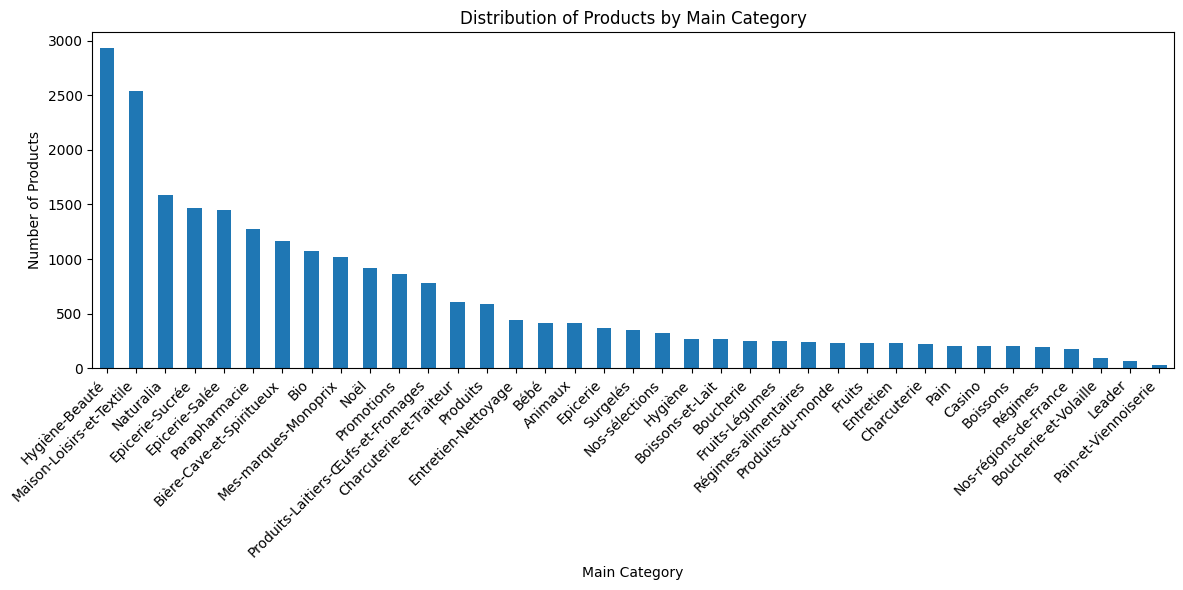

In [19]:
# Create a bar plot of the main category distribution
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
df['main_category'].value_counts().plot(kind='bar')
plt.title('Distribution of Products by Main Category')
plt.xlabel('Main Category')
plt.ylabel('Number of Products')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [24]:
# Drop rows where main_category is 'Maison'
df.to_csv("monoprix_v2_drop_outliers.csv")

NameError: name 'df' is not defined

In [4]:
df= pd.read_csv("monoprix_v2_drop_outliers.csv")

In [5]:
# Get unique main categories
monop_category=df['main_category'].unique()
monop_category=list(monop_category)
monop_category

['Animaux',
 'Bio',
 'Bière-Cave-et-Spiritueux',
 'Boissons-et-Lait',
 'Boissons',
 'Boucherie-et-Volaille',
 'Boucherie',
 'Bébé',
 'Casino',
 'Charcuterie-et-Traiteur',
 'Charcuterie',
 'Entretien-Nettoyage',
 'Entretien',
 'Epicerie-Salée',
 'Epicerie-Sucrée',
 'Epicerie',
 'Fruits-Légumes',
 'Fruits',
 'Hygiène-Beauté',
 'Hygiène',
 'Leader',
 'Maison-Loisirs-et-Textile',
 'Mes-marques-Monoprix',
 'Naturalia',
 'Nos-régions-de-France',
 'Nos-sélections',
 'Noël',
 'Pain-et-Viennoiserie',
 'Pain',
 'Parapharmacie',
 'Produits-du-monde',
 'Produits-Laitiers-Œufs-et-Fromages',
 'Produits',
 'Promotions',
 'Régimes-alimentaires',
 'Régimes',
 'Surgelés']

# Reworking categories

In [ ]:

df_auchan = pd.read_csv('/Users/lml/Documents/Golem/scripts/price-comparator/monoprix-dashboard/public/auchan_avec_category.csv')
df_auchan

,url,brand,product_name,price,price_per_unit,rating,status,category,time,price_numeric,price_per_unit_numeric,quantity,confidence
0,https://www.auchan.fr/granola-biscuits-sables-...,GRANOLA,Biscuits sablés nappés de chocolat au lait,"5,10€","8,50€ / kg",4.7,Available,Epicerie sucrée,2025-01-09 10:54:17,5.10,8.50,0.600000,0.877869
1,https://www.auchan.fr/schweppes-boisson-gazeus...,SCHWEPPES,Boisson gazeuse saveur agrumes,"11,50€","1,45€ / l",4.8,Almost there,Epicerie salée,2025-01-09 10:54:22,11.50,1.45,7.931034,0.680364
2,https://www.auchan.fr/vittel-eau-minerale-natu...,VITTEL,Eau minérale naturelle plate,"3,18€","0,35€ / l",4.6,Available,"Eaux, jus, soda, thés glacés",2025-01-09 10:54:24,3.18,0.35,9.085714,0.882069
3,https://www.auchan.fr/pampers-baby-dry-couches...,PAMPERS,Baby-Dry couches taille 5 (11-16kg),"14,73€","0,38€ / pce",4.5,Almost there,Tout pour bébé,2025-01-09 10:54:26,14.73,0.38,38.763158,0.559508
4,https://www.auchan.fr/gallia-calisma-3-lait-de...,GALLIA,Calisma 3 lait de croissance en poudre dès 12 ...,"11,49€","13,84€ / kg",3.0,Available,"Produits laitiers, oeufs, fromages",2025-01-09 10:54:30,11.49,13.84,0.830202,0.662825
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14601,https://www.auchan.fr/tanoshi-crackers-pois-wa...,TANOSHI,Crackers pois wasabi sachet,"2,80€","28,00€ / kg",4.2,Available,"Pain, pâtisserie",2025-01-13 03:00:45,2.80,28.00,0.100000,0.670047
14602,https://www.auchan.fr/suzi-wan-chips-a-la-crev...,SUZI WAN,Chips à la crevettes,"2,24€","44,80€ / kg",4.8,Available,"Boucherie, volaille, poissonnerie",2025-01-13 03:00:51,2.24,44.80,0.050000,0.684666
14603,https://www.auchan.fr/mission-wraps-multigrain...,MISSION,Wraps multigrains aux graines de lin,"4,30€","11,62€ / kg",5.0,Available,Tout pour bébé,2025-01-13 03:01:27,4.30,11.62,0.370052,0.696833
14604,https://www.auchan.fr/mission-wraps-nature/pr-...,MISSION,Wraps nature,"4,08€","11,03€ / kg",4.8,Available,Produits de nos régions,2025-01-13 03:01:34,4.08,11.03,0.369900,0.557696


In [68]:
def get_category(product_name, category_list):
    sentiment_prompt =f"""You are tasked with identifying the correct category a food related product. You are given the following:
    name of the product: {product_name}
    name of the available categories: {category_list}.
    
    You MUST return your answer in the following format:
    {{"category_name" : "name of the category from the list"}}

    ONLY return the JSON.
    """
    url = "http://api.bunka.ai:8000/v1/chat/completions"
    payload = {
        "model": "meta-llama/Llama-3.1-8B-Instruct",
        "messages": [{"role": "user", "content": sentiment_prompt}],
        "temperature": 0
    
    }
    headers = {
        "Content-Type": "application/json"
    }
    response = requests.post(url, json=payload, headers=headers)
    return response.json()['choices'][0]['message']['content']

In [ ]:
import requests
import json
answer = json.loads(get_category("",str(monop_category)))
answer


{'category_name': 'Bébé'}

In [86]:
from tqdm import tqdm
import concurrent.futures
import functools

In [90]:
# Create new column for categories
df_auchan['new_cat'] = ''

# Iterate through rows and get category for each product in parallel
from concurrent.futures import ThreadPoolExecutor
from functools import partial
from json import JSONDecodeError

def process_row(row, monop_category):
    try:
        product_name = row['product_name']
        category_response = json.loads(get_category(product_name, str(monop_category)))
        return category_response['category_name']
    except JSONDecodeError:
        return ''  # Return empty string if JSON parsing fails

# Use ThreadPoolExecutor since the task is I/O bound (making API calls)
with ThreadPoolExecutor(max_workers=100) as executor:
    # Create a partial function with monop_category argument fixed
    process_row_partial = partial(process_row, monop_category=monop_category)
    
    # Process rows in parallel and get results
    results = list(tqdm(
        executor.map(process_row_partial, [row for _, row in df_auchan.iterrows()]),
        total=len(df_auchan)
    ))

# Update the dataframe with results
df_auchan['new_cat'] = results

100%|██████████| 14606/14606 [27:34<00:00,  8.83it/s]


In [92]:
df_auchan.to_csv("auchan_new_categ.csv")

In [1]:
import pandas as pd 

In [2]:
df_intermarché = pd.read_csv("monoprix-dashboard/public/intermarché_df.csv")

In [ ]:
df_intermarché

,id,stock,available,title,packaging,brand,product_price,crossed_out_price,unit_price,kilo_litre_price,category
0,229383,2,True,Shampoing antipelliculaire 2 en 1 classique,Le lot de 3 flacons de 300ml - 900ml,Head & Shoulders,8.90,13.48,9.88,NaN,Promotions
1,45224,57,True,Pâte à tartiner aux noisettes et au cacao,Le pot de 825g,Nutella,6.76,NaN,8.19,NaN,Promotions
2,213600,9,True,White Now - Dentifrice blancheur original,Le lot de 3 tubes de 75ml - 225ml,Signal,4.74,7.18,21.02,NaN,Promotions
3,209491,2,True,"Baby Dry - Couches taille 4, 9-14kg",le paquet de 45 couches,Pampers,10.49,15.89,0.24,NaN,Promotions
4,92939,142,True,Schoko-Bons - Bonbons de chocolat fourrés lait...,le sachet de 350 g,Kinder,5.49,NaN,15.69,NaN,Promotions
...,...,...,...,...,...,...,...,...,...,...,...
32629,210068,1,True,Tondeuse visage et corps XT5100,la tondeuse,Braun,72.59,NaN,72.59,NaN,Pour le visage et Corps
32630,210021,0,True,Tondeuse barbe et cheveux MGK3410,la tondeuse,Braun,52.02,NaN,52.02,NaN,Pour le visage et Corps
32631,228419,0,True,Tondeuse à barbe Styler BT3411,l'unité,Braun,48.39,NaN,48.39,NaN,Pour le visage et Corps
32632,15716,25,True,Feuilles blanches A4 80g,la ramette de 500 feuilles,"Domédia, une marque Intermarché",4.98,NaN,4.98,NaN,High Tech


In [6]:
def get_category(product_name, category_list):
    sentiment_prompt =f"""You are tasked with identifying the correct category a food related product. You are given the following:
    name of the product: {product_name}
    name of the available categories: {category_list}.
    
    You MUST return your answer in the following format:
    {{"category_name" : "name of the category from the list"}}

    ONLY return the JSON.
    """
    url = "http://api.bunka.ai:8000/v1/chat/completions"
    payload = {
        "model": "meta-llama/Llama-3.1-8B-Instruct",
        "messages": [{"role": "user", "content": sentiment_prompt}],
        "temperature": 0
    
    }
    headers = {
        "Content-Type": "application/json"
    }
    response = requests.post(url, json=payload, headers=headers)
    return response.json()['choices'][0]['message']['content']

In [15]:
import requests
import json

def get_category(product_name, category_list, claude_api_key):
    sentiment_prompt = f"""You are tasked with identifying the correct category a food related product. You are given the following:
    name of the product: {product_name}
    name of the available categories: {category_list}.
    
    You MUST return your answer in the following format:
    {{"category_name" : "name of the category from the list"}}

    ONLY return the JSON.
    """
    
    url = "https://api.anthropic.com/v1/messages"
    
    payload = {
        "model": "claude-3-sonnet-20240229",
        "messages": [{"role": "user", "content": sentiment_prompt}],
        "temperature": 0,
        "max_tokens": 1024
    }
    
    headers = {
        "Content-Type": "application/json",
        "x-api-key": claude_api_key,
        "anthropic-version": "2023-06-01"
    }

    try:
        response = requests.post(url, json=payload, headers=headers)
        response.raise_for_status()
        return response.json()['content'][0]['text']
    except Exception as e:
        print(f"Error: {e}")
        return "{}"

In [ ]:
import requests
import json
answer = json.loads(get_category("Shampoing antipelliculaire 2 en 1 classique",str(monop_category),claude_api_key))
answer

{'category_name': 'Hygiène-Beauté'}

In [18]:
from functools import partial 
import tqdm

In [25]:
from concurrent.futures import ThreadPoolExecutor
from functools import partial
from tqdm import tqdm
import json
import time
from tenacity import retry, stop_after_attempt, wait_exponential

@retry(stop=stop_after_attempt(3), wait=wait_exponential(multiplier=2, min=4, max=20))
def process_row(df_row, monop_category, claude_api_key):
    try:
        product_name = df_row.title
        category_response = json.loads(get_category(product_name, str(monop_category), claude_api_key))
        time.sleep(1)  # Increased delay
        return category_response['category_name']
    except Exception as e:
        print(f"Error processing {df_row.title}: {str(e)}")
        return "ERROR"

# Reduced workers, added chunk processing
chunk_size = 100
results = []

for i in range(0, len(df_intermarché), chunk_size):
    chunk = df_intermarché.iloc[i:i+chunk_size]
    
    with ThreadPoolExecutor(max_workers=5) as executor:
        process_row_partial = partial(process_row, 
                                    monop_category=monop_category,
                                    claude_api_key=claude_api_key)
        
        chunk_results = list(tqdm(
            executor.map(process_row_partial, chunk.itertuples()),
            total=len(chunk)
        ))
        results.extend(chunk_results)
    
    time.sleep(2)  # Pause between chunks

df_intermarché['new_cat'] = results

 46%|████▌     | 46/100 [00:25<00:24,  2.23it/s]

Error: 529 Server Error:  for url: https://api.anthropic.com/v1/messages
Error: 529 Server Error:  for url: https://api.anthropic.com/v1/messages


 47%|████▋     | 47/100 [00:26<00:34,  1.52it/s]

Error processing Pain grillé blé complet Bio: 'category_name'
Error processing Tartines craquantes multicéréales BIO: 'category_name'


  0%|          | 0/100 [00:00<?, ?it/s]

Error: 529 Server Error:  for url: https://api.anthropic.com/v1/messages


  1%|          | 1/100 [00:02<04:30,  2.73s/it]

Error processing Filets d'anchois à l'huile de tournesol: 'category_name'


 30%|███       | 30/100 [00:18<00:33,  2.10it/s]

Error: 529 Server Error:  for url: https://api.anthropic.com/v1/messages
Error: 529 Server Error:  for url: https://api.anthropic.com/v1/messages
Error: 529 Server Error:  for url: https://api.anthropic.com/v1/messages


 32%|███▏      | 32/100 [00:20<00:43,  1.56it/s]

Error processing Biscuits Golden fourrés vanille: 'category_name'
Error processing Biscuits sablés fourrés à la framboise: 'category_name'
Error processing Sablés des Flandres: 'category_name'


 35%|███▌      | 35/100 [00:21<00:35,  1.83it/s]

Error: 529 Server Error:  for url: https://api.anthropic.com/v1/messages
Error processing Biscuit coco pavot BIO: 'category_name'


 65%|██████▌   | 65/100 [00:45<00:18,  1.89it/s]

Error: 529 Server Error:  for url: https://api.anthropic.com/v1/messages


 68%|██████▊   | 68/100 [00:47<00:17,  1.85it/s]

Error processing Belvita - Biscuits Petit Déjeuner Original chocolat: 'category_name'


 90%|█████████ | 90/100 [00:48<00:05,  1.82it/s]

Error: 529 Server Error:  for url: https://api.anthropic.com/v1/messages


 92%|█████████▏| 92/100 [00:49<00:04,  1.94it/s]

Error processing Biscuit raisins: 'category_name'


 28%|██▊       | 28/100 [00:17<00:52,  1.38it/s]

Error: 529 Server Error:  for url: https://api.anthropic.com/v1/messages


 34%|███▍      | 34/100 [00:20<00:34,  1.90it/s]

Error processing Lulu la Barquette - Génoise fraise: 'category_name'
Error: 529 Server Error:  for url: https://api.anthropic.com/v1/messages
Error processing Tartelettes citron: 'category_name'


 85%|████████▌ | 85/100 [00:51<00:08,  1.77it/s]

Error: 529 Server Error:  for url: https://api.anthropic.com/v1/messages


 86%|████████▌ | 86/100 [00:52<00:08,  1.62it/s]

Error processing Crêpes de Landerneau: 'category_name'


 65%|██████▌   | 65/100 [00:35<00:14,  2.40it/s]

Error: 529 Server Error:  for url: https://api.anthropic.com/v1/messages
Error: 529 Server Error:  for url: https://api.anthropic.com/v1/messages


 67%|██████▋   | 67/100 [00:36<00:19,  1.66it/s]

Error processing Farine blanche T65 BIO: 'category_name'
Error processing Farine de blé T55 BIO: 'category_name'


 40%|████      | 40/100 [00:21<00:25,  2.32it/s]

Error: 529 Server Error:  for url: https://api.anthropic.com/v1/messagesError: 529 Server Error:  for url: https://api.anthropic.com/v1/messages



 41%|████      | 41/100 [00:23<00:40,  1.45it/s]

Error processing Infusion menthe tilleul verveine: 'category_name'Error processing Infusion après repas: 'category_name'



 83%|████████▎ | 83/100 [00:47<00:07,  2.36it/s]

Error: 529 Server Error:  for url: https://api.anthropic.com/v1/messages


 84%|████████▍ | 84/100 [00:54<00:41,  2.57s/it]

Error processing Galettes riz chocolat lait Bio: 'category_name'


  4%|▍         | 4/100 [00:02<00:49,  1.94it/s]

Error: 529 Server Error:  for url: https://api.anthropic.com/v1/messages


  7%|▋         | 7/100 [00:05<01:02,  1.48it/s]

Error processing Velouté potiron à la crème: 'category_name'


 72%|███████▏  | 72/100 [00:38<00:13,  2.13it/s]

Error: 529 Server Error:  for url: https://api.anthropic.com/v1/messages


 74%|███████▍  | 74/100 [00:46<00:52,  2.03s/it]

Error processing Chips de pomme de terre nature BIO: 'category_name'


 15%|█▌        | 15/100 [00:14<00:32,  2.65it/s]

Error: 529 Server Error:  for url: https://api.anthropic.com/v1/messagesError: 529 Server Error:  for url: https://api.anthropic.com/v1/messages
Error: 529 Server Error:  for url: https://api.anthropic.com/v1/messages



 16%|█▌        | 16/100 [00:15<00:55,  1.52it/s]

Error processing Purée de tomates nature bio - Tomacouli: 'category_name'Error processing Dahl lentilles corail pois chiches repas express: 'category_name'
Error processing Quinoa royal carotte jaune cumin repas express: 'category_name'



 64%|██████▍   | 64/100 [00:45<00:22,  1.61it/s]

Error: 529 Server Error:  for url: https://api.anthropic.com/v1/messages


 67%|██████▋   | 67/100 [00:46<00:16,  2.05it/s]

Error processing Mouliné de tomates oignons et pointe d'herbes BIO: 'category_name'


 76%|███████▌  | 76/100 [00:53<00:13,  1.74it/s]

Error: 529 Server Error:  for url: https://api.anthropic.com/v1/messages


 79%|███████▉  | 79/100 [00:55<00:11,  1.79it/s]

Error processing Nouilles Japonaises en cup, crevettes: 'category_name'


 28%|██▊       | 28/100 [00:15<00:34,  2.08it/s]

Error: 529 Server Error:  for url: https://api.anthropic.com/v1/messages


 30%|███       | 30/100 [00:16<00:35,  1.98it/s]

Error processing Pâtes Coquillettes: 'category_name'


 63%|██████▎   | 63/100 [00:35<00:18,  2.03it/s]

Error: 529 Server Error:  for url: https://api.anthropic.com/v1/messages


 66%|██████▌   | 66/100 [00:36<00:15,  2.22it/s]

Error processing Olives noires confites dénoyautées: 'category_name'


 41%|████      | 41/100 [00:22<00:29,  1.98it/s]

Error: 529 Server Error:  for url: https://api.anthropic.com/v1/messages


 42%|████▏     | 42/100 [00:23<00:31,  1.84it/s]

Error processing Petit salé aux lentilles à la graisse de canard: 'category_name'


 10%|█         | 10/100 [00:06<00:52,  1.72it/s]

Error: 524 Server Error:  for url: https://api.anthropic.com/v1/messages


100%|██████████| 100/100 [10:06<00:00,  6.06s/it]  

Error processing Lentilles vertes du Berry Label Rouge: 'category_name'



 65%|██████▌   | 65/100 [00:34<00:12,  2.75it/s]

Error: 529 Server Error:  for url: https://api.anthropic.com/v1/messages


 69%|██████▉   | 69/100 [00:36<00:12,  2.54it/s]

Error processing Couscous grain moyen: 'category_name'


 90%|█████████ | 90/100 [00:46<00:03,  2.69it/s]

Error: 529 Server Error:  for url: https://api.anthropic.com/v1/messages


 91%|█████████ | 91/100 [00:48<00:04,  1.81it/s]

Error processing Thé glacé saveur pêche: 'category_name'


  0%|          | 0/100 [00:00<?, ?it/s]

Error: 529 Server Error:  for url: https://api.anthropic.com/v1/messages


  1%|          | 1/100 [00:02<03:51,  2.33s/it]

Error processing Sauce soja salée: 'category_name'


 61%|██████    | 61/100 [00:33<00:21,  1.80it/s]

Error: 529 Server Error:  for url: https://api.anthropic.com/v1/messages
Error: 529 Server Error:  for url: https://api.anthropic.com/v1/messages


 63%|██████▎   | 63/100 [00:34<00:19,  1.86it/s]

Error processing Crêpes de Landerneau: 'category_name'
Error processing Barres céréales pomme: 'category_name'


 69%|██████▉   | 69/100 [00:36<00:17,  1.73it/s]

Error: 529 Server Error:  for url: https://api.anthropic.com/v1/messages


 71%|███████   | 71/100 [00:36<00:15,  1.91it/s]

Error processing Champagne Brut cuvée Premium: 'category_name'


 78%|███████▊  | 78/100 [00:40<00:09,  2.28it/s]

Error: 520 Server Error:  for url: https://api.anthropic.com/v1/messages


 80%|████████  | 80/100 [00:41<00:09,  2.18it/s]

Error processing Glaçons: 'category_name'


 72%|███████▏  | 72/100 [00:37<00:16,  1.73it/s]

Error: 529 Server Error:  for url: https://api.anthropic.com/v1/messages


 75%|███████▌  | 75/100 [00:38<00:10,  2.31it/s]

Error processing Vodka pure grain triple distilled 37,5°: 'category_name'


 66%|██████▌   | 66/100 [00:36<00:33,  1.02it/s]

Error: 529 Server Error:  for url: https://api.anthropic.com/v1/messages


 67%|██████▋   | 67/100 [00:43<01:25,  2.60s/it]

Error processing Allumettes: 'category_name'


 81%|████████  | 81/100 [00:53<00:18,  1.04it/s]

Error: 529 Server Error:  for url: https://api.anthropic.com/v1/messages


 82%|████████▏ | 82/100 [00:57<00:26,  1.50s/it]

Error processing Verre à pied Elégance 40 cl: 'category_name'


 66%|██████▌   | 66/100 [00:34<00:16,  2.11it/s]

Error: 529 Server Error:  for url: https://api.anthropic.com/v1/messages


 67%|██████▋   | 67/100 [00:36<00:25,  1.28it/s]

Error processing Ristorante - Pizza spéciale jambon salami: 'category_name'


100%|██████████| 34/34 [00:18<00:00,  1.82it/s]


In [26]:
df_intermarché

,id,stock,available,title,packaging,brand,product_price,crossed_out_price,unit_price,kilo_litre_price,category,new_cat
0,229383,2,True,Shampoing antipelliculaire 2 en 1 classique,Le lot de 3 flacons de 300ml - 900ml,Head & Shoulders,8.90,13.48,9.88,NaN,Promotions,Hygiène-Beauté
1,45224,57,True,Pâte à tartiner aux noisettes et au cacao,Le pot de 825g,Nutella,6.76,NaN,8.19,NaN,Promotions,Epicerie-Sucrée
2,213600,9,True,White Now - Dentifrice blancheur original,Le lot de 3 tubes de 75ml - 225ml,Signal,4.74,7.18,21.02,NaN,Promotions,Hygiène
3,209491,2,True,"Baby Dry - Couches taille 4, 9-14kg",le paquet de 45 couches,Pampers,10.49,15.89,0.24,NaN,Promotions,Bébé
4,92939,142,True,Schoko-Bons - Bonbons de chocolat fourrés lait...,le sachet de 350 g,Kinder,5.49,NaN,15.69,NaN,Promotions,Epicerie-Sucrée
...,...,...,...,...,...,...,...,...,...,...,...,...
32629,210068,1,True,Tondeuse visage et corps XT5100,la tondeuse,Braun,72.59,NaN,72.59,NaN,Pour le visage et Corps,Hygiène-Beauté
32630,210021,0,True,Tondeuse barbe et cheveux MGK3410,la tondeuse,Braun,52.02,NaN,52.02,NaN,Pour le visage et Corps,Hygiène-Beauté
32631,228419,0,True,Tondeuse à barbe Styler BT3411,l'unité,Braun,48.39,NaN,48.39,NaN,Pour le visage et Corps,Hygiène-Beauté
32632,15716,25,True,Feuilles blanches A4 80g,la ramette de 500 feuilles,"Domédia, une marque Intermarché",4.98,NaN,4.98,NaN,High Tech,Epicerie


In [27]:
df_intermarché.to_csv("intermarché_df_with_category.csv", index=False)

In [28]:
df_intermarché = pd.read_csv("intermarché_df_with_category.csv")

In [37]:
df_intermarché['new_cat'].nunique()

37

In [ ]:
df_intermarché[df_intermarché.new_cat == 'ERROR']

,id,stock,available,title,packaging,brand,product_price,crossed_out_price,unit_price,kilo_litre_price,category,new_cat
2946,134250,7,True,Tartines craquantes multicéréales BIO,la boite de 150 g,Jardin Bio étic,2.53,NaN,16.87,NaN,Pain de mie et Galette de céréales Bio,ERROR
2947,55282,4,True,Pain grillé blé complet Bio,la boite de 250g,Bjorg,2.77,NaN,11.08,NaN,Pain de mie et Galette de céréales Bio,ERROR
5300,65062,18,True,Filets d'anchois à l'huile de tournesol,la boite de 60 g net égoutté,"Odyssée, une marque Intermarché",2.67,NaN,44.50,NaN,Harengs et Anchois,ERROR
14431,4063,9,True,Sablés des Flandres,la boîte de 250g,LU,2.31,NaN,9.24,NaN,Biscuits et sablés,ERROR
14432,73643,15,True,Biscuits sablés fourrés à la framboise,le paquet de 8 - 100 g,"Chabrior, une marque Intermarché",1.71,NaN,17.10,NaN,Biscuits et sablés,ERROR
14433,103676,6,True,Biscuits Golden fourrés vanille,le paquet de 154 g,Oreo,1.61,NaN,10.45,NaN,Biscuits et sablés,ERROR
14436,133880,17,True,Biscuit coco pavot BIO,la boîte de 132g,Gerblé,2.75,NaN,20.83,NaN,Biscuits et sablés,ERROR
14467,91403,19,True,Belvita - Biscuits Petit Déjeuner Original cho...,le paquet de 8 sachets - 400 g,LU,3.02,NaN,7.55,NaN,Biscuit sec,ERROR
14591,1016,6,True,Biscuit raisins,la boite de 270g,Gerblé,2.32,NaN,8.59,NaN,Biscuits aux fruits,ERROR
14633,1993,35,True,Lulu la Barquette - Génoise fraise,la boîte de 120g,LU,1.14,NaN,9.50,NaN,Biscuit nappé,ERROR


In [40]:
from concurrent.futures import ThreadPoolExecutor
from functools import partial
from tqdm import tqdm
import json
import time
from tenacity import retry, stop_after_attempt, wait_exponential

@retry(stop=stop_after_attempt(3), wait=wait_exponential(multiplier=2, min=4, max=20))
def process_row(df_row, monop_category, claude_api_key):
    try:
        product_name = df_row.title
        category_response = json.loads(get_category(product_name, str(monop_category), claude_api_key))
        time.sleep(1)
        return category_response['category_name']
    except Exception as e:
        print(f"Error processing {df_row.title}: {str(e)}")
        return "ERROR"

# Get only the ERROR rows
error_mask = df_intermarché['new_cat'] == "ERROR"

with ThreadPoolExecutor(max_workers=5) as executor:
    process_row_partial = partial(process_row,
                              monop_category=monop_category,
                              claude_api_key=claude_api_key)
    
    results = list(tqdm(
        executor.map(process_row_partial, df_intermarché[error_mask].itertuples()),
        total=error_mask.sum()
    ))

# Update only the ERROR rows with their new results
df_intermarché.loc[error_mask, 'new_cat'] = results

100%|██████████| 39/39 [00:19<00:00,  2.04it/s]


In [41]:
df_intermarché.to_csv("intermarché_df_with_category.csv", index=False)

In [43]:
df = pd.read_csv("intermarché_df_with_category.csv")    

In [47]:
df.new_cat.unique()

array(['Hygiène-Beauté', 'Epicerie-Sucrée', 'Hygiène', 'Bébé',
       'Epicerie-Salée', 'Fruits-Légumes', 'Nos-régions-de-France',
       'Produits-Laitiers-Œufs-et-Fromages', 'Charcuterie',
       'Produits-du-monde', 'Surgelés', 'Pain-et-Viennoiserie',
       'Boissons', 'Epicerie', 'Bio', 'Boucherie-et-Volaille',
       'Charcuterie-et-Traiteur', 'Boucherie', 'Produits',
       'Bière-Cave-et-Spiritueux', 'Animaux', 'Maison-Loisirs-et-Textile',
       'Entretien-Nettoyage', 'Entretien', 'Fruits',
       'Régimes-alimentaires', 'Naturalia', 'Pain', 'Régimes',
       'Boissons-et-Lait', 'Parapharmacie', 'Poissonnerie', 'Poissons',
       'Nos-sélections', 'Jouets', 'Noël'], dtype=object)

##Renommer les colonnes

In [49]:
df_monoprix =pd.read_csv("monoprix_v2_drop_outliers.csv")

In [50]:
df_intermarché = pd.read_csv("intermarché_df_with_category.csv")    

In [71]:
df_intermarché

,id,stock,available,title,packaging,brand,product_price,crossed_out_price,unit_price,kilo_litre_price,category,new_cat
0,229383,2,True,Shampoing antipelliculaire 2 en 1 classique,Le lot de 3 flacons de 300ml - 900ml,Head & Shoulders,8.90,13.48,9.88,NaN,Promotions,Hygiène-Beauté
1,45224,57,True,Pâte à tartiner aux noisettes et au cacao,Le pot de 825g,Nutella,6.76,NaN,8.19,NaN,Promotions,Epicerie-Sucrée
2,213600,9,True,White Now - Dentifrice blancheur original,Le lot de 3 tubes de 75ml - 225ml,Signal,4.74,7.18,21.02,NaN,Promotions,Hygiène
3,209491,2,True,"Baby Dry - Couches taille 4, 9-14kg",le paquet de 45 couches,Pampers,10.49,15.89,0.24,NaN,Promotions,Bébé
4,92939,142,True,Schoko-Bons - Bonbons de chocolat fourrés lait...,le sachet de 350 g,Kinder,5.49,NaN,15.69,NaN,Promotions,Epicerie-Sucrée
...,...,...,...,...,...,...,...,...,...,...,...,...
32629,210068,1,True,Tondeuse visage et corps XT5100,la tondeuse,Braun,72.59,NaN,72.59,NaN,Pour le visage et Corps,Hygiène-Beauté
32630,210021,0,True,Tondeuse barbe et cheveux MGK3410,la tondeuse,Braun,52.02,NaN,52.02,NaN,Pour le visage et Corps,Hygiène-Beauté
32631,228419,0,True,Tondeuse à barbe Styler BT3411,l'unité,Braun,48.39,NaN,48.39,NaN,Pour le visage et Corps,Hygiène-Beauté
32632,15716,25,True,Feuilles blanches A4 80g,la ramette de 500 feuilles,"Domédia, une marque Intermarché",4.98,NaN,4.98,NaN,High Tech,Epicerie


In [52]:
df_auchan = pd.read_csv("auchan_new_categ.csv")

In [70]:
df_auchan

,url,brand,product_name,price,price_per_unit,rating,status,category,time,price_numeric,price_per_unit_numeric,quantity,confidence,new_cat
0,https://www.auchan.fr/granola-biscuits-sables-...,GRANOLA,Biscuits sablés nappés de chocolat au lait,"5,10€","8,50€ / kg",4.7,Available,Epicerie sucrée,2025-01-09 10:54:17,5.10,8.50,0.600000,0.877869,Pain-et-Viennoiserie
1,https://www.auchan.fr/schweppes-boisson-gazeus...,SCHWEPPES,Boisson gazeuse saveur agrumes,"11,50€","1,45€ / l",4.8,Almost there,Epicerie salée,2025-01-09 10:54:22,11.50,1.45,7.931034,0.680364,Boissons
2,https://www.auchan.fr/vittel-eau-minerale-natu...,VITTEL,Eau minérale naturelle plate,"3,18€","0,35€ / l",4.6,Available,"Eaux, jus, soda, thés glacés",2025-01-09 10:54:24,3.18,0.35,9.085714,0.882069,Boissons
3,https://www.auchan.fr/pampers-baby-dry-couches...,PAMPERS,Baby-Dry couches taille 5 (11-16kg),"14,73€","0,38€ / pce",4.5,Almost there,Tout pour bébé,2025-01-09 10:54:26,14.73,0.38,38.763158,0.559508,Bébé
4,https://www.auchan.fr/gallia-calisma-3-lait-de...,GALLIA,Calisma 3 lait de croissance en poudre dès 12 ...,"11,49€","13,84€ / kg",3.0,Available,"Produits laitiers, oeufs, fromages",2025-01-09 10:54:30,11.49,13.84,0.830202,0.662825,Boissons-et-Lait
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14601,https://www.auchan.fr/tanoshi-crackers-pois-wa...,TANOSHI,Crackers pois wasabi sachet,"2,80€","28,00€ / kg",4.2,Available,"Pain, pâtisserie",2025-01-13 03:00:45,2.80,28.00,0.100000,0.670047,Epicerie-Salée
14602,https://www.auchan.fr/suzi-wan-chips-a-la-crev...,SUZI WAN,Chips à la crevettes,"2,24€","44,80€ / kg",4.8,Available,"Boucherie, volaille, poissonnerie",2025-01-13 03:00:51,2.24,44.80,0.050000,0.684666,Epicerie-Salée
14603,https://www.auchan.fr/mission-wraps-multigrain...,MISSION,Wraps multigrains aux graines de lin,"4,30€","11,62€ / kg",5.0,Available,Tout pour bébé,2025-01-13 03:01:27,4.30,11.62,0.370052,0.696833,Pain
14604,https://www.auchan.fr/mission-wraps-nature/pr-...,MISSION,Wraps nature,"4,08€","11,03€ / kg",4.8,Available,Produits de nos régions,2025-01-13 03:01:34,4.08,11.03,0.369900,0.557696,Epicerie-Sucrée


In [78]:
# Mapping pour df_intermarché
intermarche_mapping = {
    'id': 'productId',
    'brand': 'brand',
    'title': 'name',
    'product_price': 'price_eur',
    'unit_price': 'price_per_kg_eur',
    'available': 'available',
    'packaging': 'size_value',
    'new_cat': 'main_category'
}

# Mapping pour df_auchan
auchan_mapping = {
    'url': 'productId',  # Garder original car pas d'équivalent
    'brand': 'brand',
    'product_name': 'name',
    'price': 'price_eur',
    'price_per_unit': 'price_per_kg_eur',
    'status': 'available',
    'price_per_unit_numeric': 'price_per_kg_eur',
    'quantity': 'size_value',
    'new_cat': 'main_category'
}

# Application du mapping
df_intermarche_harmonized = df_intermarché.rename(columns=intermarche_mapping)
df_auchan_harmonized = df_auchan.rename(columns=auchan_mapping)

In [81]:
df_auchan_harmonized = df_auchan_harmonized.drop(columns=['rating', 'price_numeric', 'price_per_kg_eur', 'confidence','time'])
df_auchan_harmonized

,productId,brand,name,price_eur,available,category,size_value,main_category
0,https://www.auchan.fr/granola-biscuits-sables-...,GRANOLA,Biscuits sablés nappés de chocolat au lait,"5,10€",Available,Epicerie sucrée,0.600000,Pain-et-Viennoiserie
1,https://www.auchan.fr/schweppes-boisson-gazeus...,SCHWEPPES,Boisson gazeuse saveur agrumes,"11,50€",Almost there,Epicerie salée,7.931034,Boissons
2,https://www.auchan.fr/vittel-eau-minerale-natu...,VITTEL,Eau minérale naturelle plate,"3,18€",Available,"Eaux, jus, soda, thés glacés",9.085714,Boissons
3,https://www.auchan.fr/pampers-baby-dry-couches...,PAMPERS,Baby-Dry couches taille 5 (11-16kg),"14,73€",Almost there,Tout pour bébé,38.763158,Bébé
4,https://www.auchan.fr/gallia-calisma-3-lait-de...,GALLIA,Calisma 3 lait de croissance en poudre dès 12 ...,"11,49€",Available,"Produits laitiers, oeufs, fromages",0.830202,Boissons-et-Lait
...,...,...,...,...,...,...,...,...
14601,https://www.auchan.fr/tanoshi-crackers-pois-wa...,TANOSHI,Crackers pois wasabi sachet,"2,80€",Available,"Pain, pâtisserie",0.100000,Epicerie-Salée
14602,https://www.auchan.fr/suzi-wan-chips-a-la-crev...,SUZI WAN,Chips à la crevettes,"2,24€",Available,"Boucherie, volaille, poissonnerie",0.050000,Epicerie-Salée
14603,https://www.auchan.fr/mission-wraps-multigrain...,MISSION,Wraps multigrains aux graines de lin,"4,30€",Available,Tout pour bébé,0.370052,Pain
14604,https://www.auchan.fr/mission-wraps-nature/pr-...,MISSION,Wraps nature,"4,08€",Available,Produits de nos régions,0.369900,Epicerie-Sucrée


In [82]:
df_auchan_harmonized.to_csv("auchan_harmonized.csv", index=False)

In [85]:
df_intermarche_harmonized = df_intermarche_harmonized.drop(columns=['stock', 'crossed_out_price', 'kilo_litre_price', 'category'])
df_intermarche_harmonized

,productId,available,name,size_value,brand,price_eur,price_per_kg_eur,main_category
0,229383,True,Shampoing antipelliculaire 2 en 1 classique,Le lot de 3 flacons de 300ml - 900ml,Head & Shoulders,8.90,9.88,Hygiène-Beauté
1,45224,True,Pâte à tartiner aux noisettes et au cacao,Le pot de 825g,Nutella,6.76,8.19,Epicerie-Sucrée
2,213600,True,White Now - Dentifrice blancheur original,Le lot de 3 tubes de 75ml - 225ml,Signal,4.74,21.02,Hygiène
3,209491,True,"Baby Dry - Couches taille 4, 9-14kg",le paquet de 45 couches,Pampers,10.49,0.24,Bébé
4,92939,True,Schoko-Bons - Bonbons de chocolat fourrés lait...,le sachet de 350 g,Kinder,5.49,15.69,Epicerie-Sucrée
...,...,...,...,...,...,...,...,...
32629,210068,True,Tondeuse visage et corps XT5100,la tondeuse,Braun,72.59,72.59,Hygiène-Beauté
32630,210021,True,Tondeuse barbe et cheveux MGK3410,la tondeuse,Braun,52.02,52.02,Hygiène-Beauté
32631,228419,True,Tondeuse à barbe Styler BT3411,l'unité,Braun,48.39,48.39,Hygiène-Beauté
32632,15716,True,Feuilles blanches A4 80g,la ramette de 500 feuilles,"Domédia, une marque Intermarché",4.98,4.98,Epicerie


In [86]:
df_intermarche_harmonized.to_csv("intermarche_harmonized.csv", index=False)

In [55]:
df_monoprix = df_monoprix.drop(columns=['Unnamed: 0.1', 'Unnamed: 0'])
df_monoprix

,main_category,productId,retailerProductId,name,price_eur,price_per_kg_eur,categoryPath,brand,available,maxQuantityReached,featured,guaranteed_life_quantity,guaranteed_life_unit,size_value,attributes_labels,image_src
0,Animaux,0fe77782-bec5-4fa2-ab53-3aa047fcee33,MPX_3859604,Purina One Croquettes pour Chien Mini -10kg Co...,7.09,4.73,"['Animaux', 'Chien', 'Croquettes', 'Petits Chi...",Purina,True,False,False,1.0,MONTH,1.5kg,[],https://courses.monoprix.fr/images-v3/0c44253f...
1,Animaux,40735017-b24c-468f-8220-f818184aaba0,MPX_2753156,Catsan Litière Minérale Agglomérante Pour Chat 5L,6.29,1.26,"['Animaux', 'Chat', 'Litière']",Catsan,True,False,False,NaN,NaN,5L,[],https://courses.monoprix.fr/images-v3/0c44253f...
2,Animaux,c51ae972-f368-412d-91d4-c9744f462c10,MPX_2482411,Catsan Hygiène Plus Litière Minérale Pour Chat...,7.59,1.57,"['Animaux', 'Chat', 'Litière']",Catsan,True,False,False,1.0,YEAR,4.844kg,[],https://courses.monoprix.fr/images-v3/0c44253f...
3,Animaux,023aa724-7ce8-4804-aef9-c1a362e87e80,MPX_4220143,Sheba Filets Au Poulet Et Au Thon Msc Pour Cha...,1.59,26.50,"['Animaux', 'Chat', 'Boites et Barquettes', 'S...",Sheba,True,False,False,6.0,MONTH,60g,[],https://courses.monoprix.fr/images-v3/0c44253f...
4,Animaux,fb864f52-c4d9-48eb-99df-dba306aaa12d,MPX_4215344,Sheba Filets Les Effilés de Poulet pour chat a...,1.59,26.50,"['Animaux', 'Chat', 'Boites et Barquettes', 'S...",Sheba,True,False,False,6.0,MONTH,60g,[],https://courses.monoprix.fr/images-v3/0c44253f...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23914,Surgelés,a63914f0-9508-4f82-82a6-3d69d1306149,MPX_5395126,Monoprix Moelleux au chocolat 190g,3.35,17.63,"['Mes marques Monoprix', 'Monoprix', 'Surgelés...",Monoprix,True,False,False,6.0,MONTH,190g,['Produit congelé'],https://courses.monoprix.fr/images-v3/0c44253f...
23915,Surgelés,5f8aec24-d1d3-43e8-a204-ef06417b8985,MPX_6593525,Monoprix 8 steaks hachés rond burger 1kg,12.90,12.90,"['Nos sélections', 'Inspiration du moment', 'N...",Monoprix,True,False,False,2.0,MONTH,1kg,['Produit congelé'],https://courses.monoprix.fr/images-v3/0c44253f...
23916,Surgelés,d50298a3-9158-420a-956e-4b7fb51dedbe,MPX_6708744,Hari&Co Emincé Végétal Bio 400g,5.69,14.23,"['Surgelés', 'Viandes surgelées', 'Steak et St...",Hari&Co,True,False,False,6.0,MONTH,400g,"['Produit congelé', 'Produit vegan', 'Produit ...",https://courses.monoprix.fr/images-v3/0c44253f...
23917,Surgelés,48012eb5-59b3-44f5-a381-6286a0a1be2a,MPX_126957,Monoprix 4 Steaks Hachés Pur Boeuf 15% Mg Surg...,7.89,19.73,"['Nos sélections', 'Inspiration du moment', 'N...",Monoprix,True,False,False,2.0,MONTH,400g,['Produit congelé'],https://courses.monoprix.fr/images-v3/0c44253f...


In [72]:
df_intermarché

,id,stock,available,title,packaging,brand,product_price,crossed_out_price,unit_price,kilo_litre_price,category,new_cat
0,229383,2,True,Shampoing antipelliculaire 2 en 1 classique,Le lot de 3 flacons de 300ml - 900ml,Head & Shoulders,8.90,13.48,9.88,NaN,Promotions,Hygiène-Beauté
1,45224,57,True,Pâte à tartiner aux noisettes et au cacao,Le pot de 825g,Nutella,6.76,NaN,8.19,NaN,Promotions,Epicerie-Sucrée
2,213600,9,True,White Now - Dentifrice blancheur original,Le lot de 3 tubes de 75ml - 225ml,Signal,4.74,7.18,21.02,NaN,Promotions,Hygiène
3,209491,2,True,"Baby Dry - Couches taille 4, 9-14kg",le paquet de 45 couches,Pampers,10.49,15.89,0.24,NaN,Promotions,Bébé
4,92939,142,True,Schoko-Bons - Bonbons de chocolat fourrés lait...,le sachet de 350 g,Kinder,5.49,NaN,15.69,NaN,Promotions,Epicerie-Sucrée
...,...,...,...,...,...,...,...,...,...,...,...,...
32629,210068,1,True,Tondeuse visage et corps XT5100,la tondeuse,Braun,72.59,NaN,72.59,NaN,Pour le visage et Corps,Hygiène-Beauté
32630,210021,0,True,Tondeuse barbe et cheveux MGK3410,la tondeuse,Braun,52.02,NaN,52.02,NaN,Pour le visage et Corps,Hygiène-Beauté
32631,228419,0,True,Tondeuse à barbe Styler BT3411,l'unité,Braun,48.39,NaN,48.39,NaN,Pour le visage et Corps,Hygiène-Beauté
32632,15716,25,True,Feuilles blanches A4 80g,la ramette de 500 feuilles,"Domédia, une marque Intermarché",4.98,NaN,4.98,NaN,High Tech,Epicerie


In [77]:
# Filter rows where kilo_litre_price is not null
kilo_litre_data = df_intermarché[df_intermarché['kilo_litre_price'].notnull()]

# Display the filtered data
print(kilo_litre_data)

           id  stock  available                                    title  \
166    237359      6       True      Mini pizzas Piccolissima Proscuitto   
301     31276     10       True           Fromage pour tartiflette 27%MG   
366    209564      5       True  Ultimate plus - capsules lave-vaisselle   
389      6265      7       True       Café et chicorée solubles Original   
407    209584      0       True       Ultimate - capsules lave-vaisselle   
...       ...    ...        ...                                      ...   
31680  237359      6       True      Mini pizzas Piccolissima Proscuitto   
31969  237359      6       True      Mini pizzas Piccolissima Proscuitto   
32188  237359      6       True      Mini pizzas Piccolissima Proscuitto   
32374  237359      6       True      Mini pizzas Piccolissima Proscuitto   
32560  237359      6       True      Mini pizzas Piccolissima Proscuitto   

                      packaging       brand  product_price  crossed_out_price  \
166   

In [62]:
import requests

def generate_and_execute_script(claude_api_key):
    # Define the prompt instructing the AI to generate a complete, autonomous Python script.
    prompt = """As a data science expert, generate a complete and autonomous Python script that meets the following requirements:

1. The script must import the necessary libraries and define a function that:
   - Takes as input three DataFrames: df_monoprix (reference), df_intermarché, and df_auchan.
   - Creates backup copies.
   - Returns the harmonized DataFrames along with a report of the modifications.

2. For each column in df_intermarché and df_auchan, the script must:
   - Use the eval() method to execute a call to the AI with the following prompt:

   '''
   As an expert in retail data, analyze the possible correspondence between the column '{column_name}' from {df_source} and the available columns in df_monoprix: {monoprix_columns_list}.

   To perform your analysis:
   1. Examine the column name and its context in {df_source}.
   2. Compare it with each column in df_monoprix.
   3. Consider common business synonyms (e.g., price/tariff, product/item).
   4. Evaluate the confidence level of the match.

   Respond strictly in the following format:
   1. Detailed analysis of the likely meaning of the source column.
   2. Comparison with potential columns from df_monoprix.
   3. Confidence level (High/Medium/Low).
   4. Conclusion in this exact format:
      - If a reliable match is found: RENAME:{monoprix_column_name}.
      - If uncertain or no match: KEEP.
   '''

   - Parse the response to extract the decision (RENAME or KEEP).
   - Apply renaming if necessary.
   - Record the action in the report.

3. The script must be fully executable via eval() and include:
   - Error handling.
   - Clear logs.
   - Explanatory comments.

Generate and return only the structured and executable Python code.RETURN ONLY THE CODE.
"""

    # Set up the API request to Claude.
    url = "https://api.anthropic.com/v1/messages"
    payload = {
        "model": "claude-3-sonnet-20240229",
        "messages": [{"role": "user", "content": prompt}],
        "temperature": 0,
        "max_tokens": 4096
    }
    headers = {
        "Content-Type": "application/json",
        "x-api-key": claude_api_key,
        "anthropic-version": "2023-06-01"
    }

    try:
        # Send the request to the API.
        response = requests.post(url, json=payload, headers=headers)
        response.raise_for_status()
        
        # Extract the generated code from the API response.
        generated_code = response.json()['content'][0]['text']
        print("Generated code:\n", generated_code)
        
        # Execute the returned multi-line code using exec() instead of eval()
        exec(generated_code)
        
    except Exception as e:
        print("Error during API call or code execution:", e)


# generate_and_execute_script(claude_api_key)



In [66]:
prompt = """As a data science expert, generate a complete and autonomous Python script that meets the following requirements:

1. The script must import the necessary libraries and define a function that:
   - Takes as input three DataFrames: df_monoprix (reference), df_intermarché, and df_auchan.
   - Creates backup copies.
   - Returns the harmonized DataFrames along with a report of the modifications.

2. For each column in df_intermarché and df_auchan, the script must:
   - Use the eval() method to execute a call to the AI with the following prompt:

   '''
   As an expert in retail data, analyze the possible correspondence between the column '{column_name}' from {df_source} and the available columns in df_monoprix: {monoprix_columns_list}.

   To perform your analysis:
   1. Examine the column name and its context in {df_source}.
   2. Compare it with each column in df_monoprix.
   3. Consider common business synonyms (e.g., price/tariff, product/item).
   4. Evaluate the confidence level of the match.

   Respond strictly in the following format:
   1. Detailed analysis of the likely meaning of the source column.
   2. Comparison with potential columns from df_monoprix.
   3. Confidence level (High/Medium/Low).
   4. Conclusion in this exact format:
      - If a reliable match is found: RENAME:{monoprix_column_name}.
      - If uncertain or no match: KEEP.
   '''

   - Parse the response to extract the decision (RENAME or KEEP).
   - Apply renaming if necessary.
   - Record the action in the report.

3. The script must be fully executable via eval() and include:
   - Error handling.
   - Clear logs.
   - Explanatory comments.

Generate and return only the structured and executable Python code.RETURN ONLY THE CODE.
"""
